# Summarizing metrics from disturbed vertical lines

Leanne Friedrich 11/15/22

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_vert_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [71]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'singleDoubleTriple', 'summaries', 'VertSDTSummaries.csv')
                             , diag=True)

Independents: 
	 printFolder, int_Ca, bn, date, sigma, fluFile, calibFile, spacing, vRatio, dEst, viscRatio, rGrav, int_Re, ReRatio, hDragP, vDragP, int_CaInv, pressureCh0
	 sup_Ca, sup_dnorm, sup_We, sup_Oh, sup_shortname, sup_days, sup_rheModifier, sup_surfactant, sup_surfactantWt, sup_dye, sup_var, sup_val, sup_base, sup_type, sup_tau0, sup_eta0, sup_density, sup_v, sup_rate, sup_visc0, sup_CaInv, sup_Re, sup_WeInv, sup_OhInv, sup_dPR, sup_dnormInv, sup_Bm
	 ink_Ca, ink_dnorm, ink_We, ink_Oh, ink_shortname, ink_days, ink_rheModifier, ink_surfactant, ink_surfactantWt, ink_dye, ink_var, ink_val, ink_base, ink_type, ink_tau0, ink_eta0, ink_density, ink_v, ink_rate, ink_visc0, ink_CaInv, ink_Re, ink_WeInv, ink_OhInv, ink_dPR, ink_dnormInv, ink_Bm

Dependents:  x0, dxprint, segments, w, h, xf, xc, roughness, emptiness, meanT, stdevT, minmaxT, dx0, dxf, space_a, space_at, ldiff


,0,1,2
wp,X_w0p,X_w1p,X_w2p
wo,X_w0o,X_w1o,X_w2o
dw/dt,dXdt_w0o,dXdt_w1o,dXdt_w2o
wrelax,delta_X_w0relax,delta_X_w1relax,delta_X_w2relax
write,,delta_X_write1,delta_X_write2
dp,X_d0p,X_d1p,
do,X_d0o,X_d1o,
dd/dt,dXdt_d0o,dXdt_d1o,
drelax,delta_X_d0relax,delta_X_d1relax,
disturb,delta_X_disturb0,delta_X_disturb1,


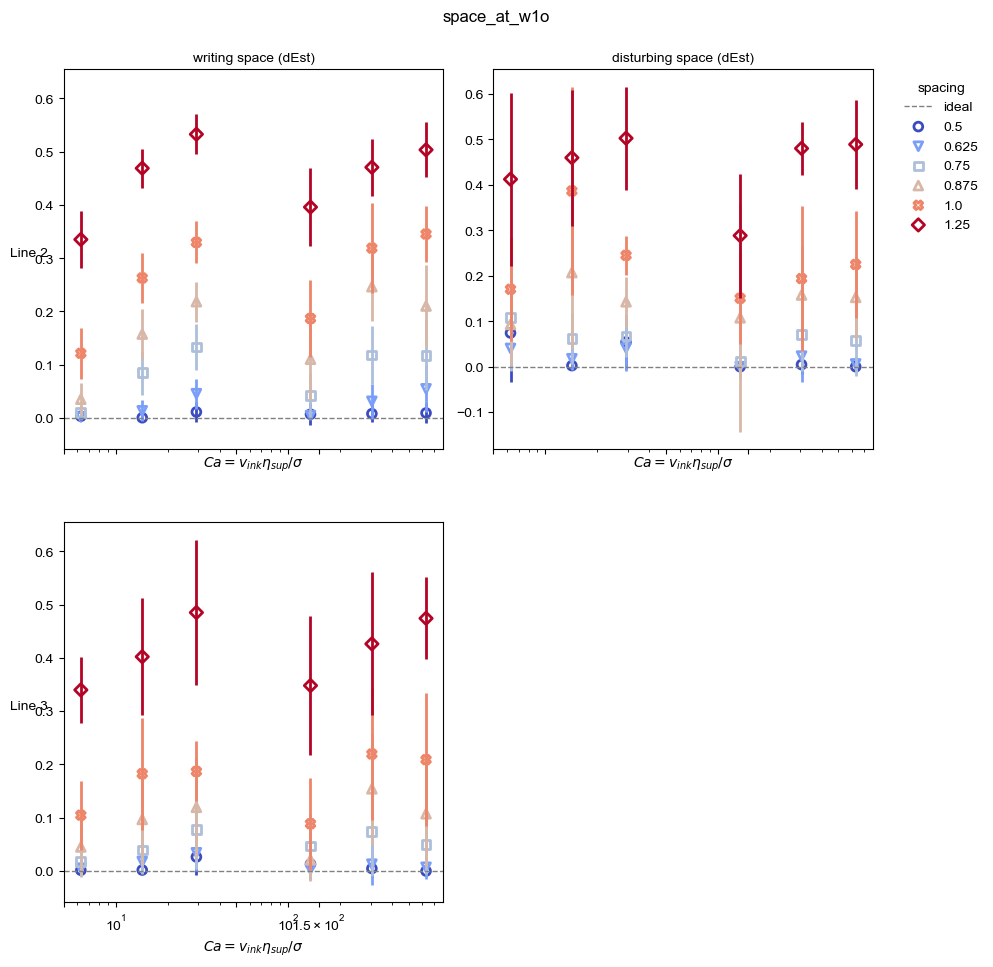

In [119]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='space_at', zvar='spacing', llist=[2, 3]
             , plist=['wp', 'dp'], plotType='notebook', yideal={'wp':0, 'dp':0}
                   , logx=True, mode='scatter')

In [85]:
rgt = mp.regressionTables(ms, ms.ss[ms.ss.spacing==1.250], 'segments_w2o', logy=False, printOut=True, export=False, package='tabular')

\begin{table}[H]
\centering
\caption[Linear regressions for 2nd written segments at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{2nd written segments} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:segments_w2oRegNonZero}
\begin{tabular}{llrrll}
                                         variables & $r^2$ &     b &    c & Spearman coeff & Spearman p \\
                                              $Ca$ &  0.09 & -0.07 & 2.14 &          -0.37 &    7.1e-02 \\
                                        $Ca_{ink}$ &  0.02 & -0.04 & 2.01 &          -0.09 &    6.7e-01 \\
                                        $Ca_{sup}$ &  0.09 & -0.07 & 2.14 &          -0.37 &    7.1e-02 \\
                         $Ca_

In [196]:
rgt.objlist[0].show()

\begin{table}[H]
\centering
\caption[Linear regressions for dhdt_w1o at nonzero surface tension.]{Table of linear regressions of log-scaled x variables and Spearman rank correlations for \textbf{dhdt_w1o} at nonzero surface tension. For example, ${Re}_{ink}$ indicates a regression fit to $y = b*log_{10}(Re_{ink}) + c$. A Spearman rank correlation coefficient of -1 or 1 indicates a strong correlation. Variables are defined in table \ref{tab:variableDefs}.}
\label{tab:dhdt_w1oRegNonZero}
\begin{tabular}{llrrll}
                                         variables &       $r^2$ &     b &     c & Spearman coeff &     Spearman p \\
                                           spacing &        0.00 &  0.03 & -0.09 &           0.04 &        5.6e-01 \\
                                         $\bm{Ca}$ & $\bm{0.34}$ &  0.10 & -0.21 &    $\bm{0.90}$ & $\bm{1.1e-78}$ \\
                                        $Ca_{ink}$ &        0.18 &  0.08 & -0.01 &           0.62 &        1.7e-24 \\
             